# LogNormal Eval
- LogNormal (n1) from __random init__

In [1]:
import pandas as pd
import numpy as np
import os 
# # This is for only if you have multiple GPUs
# # If you have multiple GPUs, then pick ONE for this code.
# os.environ["CUDA_VISIBLE_DEVICES"]= "2" 
import tensorflow as tf

np.random.seed(1004)
tf.random.set_seed(1004)

/tmp/ipykernel_801101/1790855291.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-05-13 18:37:50.933095: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 18:37:50.968968: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 18:

In [2]:
import sys
import importlib
sys.path.append('../')

import model, evaluations, data, utils, data_hp
importlib.reload(model)
importlib.reload(evaluations)
importlib.reload(data)
importlib.reload(utils)
importlib.reload(data_hp)

<module 'data_hp' from '/home/ylee/WirelessSensor2024/DataAnalysis/../data_hp.py'>

In [3]:
dir_main = '../saved_models'
max_iterations = 10
data_size_test = data_hp.data_size_test

# LogNormal Test Data

In [4]:
dict_ln = data_hp.dict_ln1

con_ln = data.LogNormal(
        eta=dict_ln["eta"],
        Pt=dict_ln["Pt"],
        alpha_1=dict_ln["alpha_1"],
        alpha_2=dict_ln["alpha_2"],
        delta_1=dict_ln["delta_1"],
        delta_2=dict_ln["delta_2"],
        d_0=dict_ln["d_0"],
        d_c=dict_ln["d_c"],
        d_array=dict_ln["d_array"],
    ) 
test_ln_data, test_ln_indices = con_ln.generate(data_size_test)
df_ln_test_back_scaled = pd.DataFrame(np.hstack((test_ln_data, test_ln_indices,)), columns=['genuine', 'd'])


# LogNormal1 from __Random Init__ 

In [5]:
name_dir_ln_f = 'LogNormal_from_N_False'
dir_sub_ln_f = "LogNormal"
dir_ln_f = f"{dir_main}/{name_dir_ln_f}"

list_dir_csv_ln_f = list()
for ep in range(max_iterations):
    list_dir_csv_ln_f.append(f"{dir_ln_f}/{ep}/{dir_sub_ln_f}/log.csv")

list_dir_csv_ln_f

['../saved_models/LogNormal_from_N_False/0/LogNormal/log.csv',
 '../saved_models/LogNormal_from_N_False/1/LogNormal/log.csv',
 '../saved_models/LogNormal_from_N_False/2/LogNormal/log.csv',
 '../saved_models/LogNormal_from_N_False/3/LogNormal/log.csv',
 '../saved_models/LogNormal_from_N_False/4/LogNormal/log.csv',
 '../saved_models/LogNormal_from_N_False/5/LogNormal/log.csv',
 '../saved_models/LogNormal_from_N_False/6/LogNormal/log.csv',
 '../saved_models/LogNormal_from_N_False/7/LogNormal/log.csv',
 '../saved_models/LogNormal_from_N_False/8/LogNormal/log.csv',
 '../saved_models/LogNormal_from_N_False/9/LogNormal/log.csv']

In [6]:
list_csv_ln_f = list()
for version, local_dir in enumerate(list_dir_csv_ln_f):
    local_df_ln_f = pd.read_csv(local_dir)
    local_df_ln_f['version'] = version
    list_csv_ln_f.append(local_df_ln_f)

list_csv_ln_f

[    epoch      loss  val_loss    avg_oa       std  version
 0       1  3.183319  1.158776  0.137875  0.061440        0
 1       2  2.049450  1.469247  0.129383  0.114283        0
 2       3  0.961554  0.762130  0.286449  0.181707        0
 3       4  1.103994 -0.009970  0.381153  0.196535        0
 4       5 -0.155626 -0.731936  0.619339  0.110944        0
 5       6 -0.824327 -1.157304  0.934798  0.045461        0
 6       7 -1.059052 -1.069361  0.825070  0.074695        0
 7       8 -1.145099 -1.173790  0.960422  0.017544        0
 8       9 -1.138133 -1.075561  0.850393  0.091098        0
 9      10 -1.154272 -1.175981  0.961096  0.015032        0
 10     11 -1.152116 -0.887770  0.733280  0.097578        0
 11     12 -1.143401 -1.144162  0.890240  0.033685        0
 12     13 -1.155039 -1.069886  0.828820  0.080110        0
 13     14 -1.139166 -1.168690  0.939189  0.040104        0
 14     15 -1.154740 -1.174899  0.953844  0.025166        0,
     epoch      loss  val_loss    avg_o

In [7]:
df_whole_ln_f = pd.concat(list_csv_ln_f, axis=0).reset_index(drop=True)
df_whole_ln_f['metric'] = df_whole_ln_f['avg_oa'] - 2 * df_whole_ln_f['std']
df_whole_ln_f

epoch      loss  val_loss    avg_oa       std  version    metric
0        1  3.183319  1.158776  0.137875  0.061440        0  0.014996
1        2  2.049450  1.469247  0.129383  0.114283        0 -0.099183
2        3  0.961554  0.762130  0.286449  0.181707        0 -0.076966
3        4  1.103994 -0.009970  0.381153  0.196535        0 -0.011918
4        5 -0.155626 -0.731936  0.619339  0.110944        0  0.397451
..     ...       ...       ...       ...       ...      ...       ...
145     11 -1.012192 -0.960905  0.753994  0.094607        9  0.564779
146     12 -1.023876 -1.050628  0.812638  0.076952        9  0.658734
147     13 -1.043563 -1.042831  0.805427  0.084585        9  0.636256
148     14 -1.089613 -1.139616  0.898710  0.051139        9  0.796433
149     15 -1.026515 -0.903173  0.738013  0.116000        9  0.506014

[150 rows x 7 columns]

In [8]:
df_whole_ln_f[df_whole_ln_f['loss'].isna()]['version'].unique()

array([], dtype=int64)

In [9]:
df_whole_ln_f.groupby(by=['epoch']).mean()

loss  val_loss    avg_oa       std  version    metric
epoch                                                           
1      2.911005  2.174813  0.051634  0.056949      4.5 -0.062264
2      1.449513  1.560059  0.130472  0.089333      4.5 -0.048193
3      0.731448  0.085475  0.375635  0.147742      4.5  0.080150
4      0.078243 -0.164801  0.474533  0.142324      4.5  0.189885
5     -0.571745 -0.924813  0.746991  0.126524      4.5  0.493943
6     -0.882554 -0.995418  0.809468  0.090334      4.5  0.628799
7     -1.010438 -1.079029  0.850532  0.093060      4.5  0.664411
8     -1.007995 -0.906920  0.839884  0.076107      4.5  0.687670
9     -0.995563 -1.112220  0.885970  0.082174      4.5  0.721623
10    -1.101152 -1.080600  0.871123  0.053078      4.5  0.764967
11    -1.113475 -1.071706  0.855459  0.078929      4.5  0.697601
12    -1.100766 -1.017582  0.828338  0.063431      4.5  0.701475
13    -1.093595 -1.068420  0.838363  0.074594      4.5  0.689175
14    -1.129627 -1.139259  0.902877  0.055371      4.5  0.792135
15    -1.126243 -1.111764  0.881071  0.049445      4.5  0.782182

In [10]:
df_whole_ln_f.groupby(by=['epoch'])['avg_oa'].mean(), df_whole_ln_f.groupby(by=['epoch'])['avg_oa'].std()

(epoch
 1     0.051634
 2     0.130472
 3     0.375635
 4     0.474533
 5     0.746991
 6     0.809468
 7     0.850532
 8     0.839884
 9     0.885970
 10    0.871123
 11    0.855459
 12    0.828338
 13    0.838363
 14    0.902877
 15    0.881071
 Name: avg_oa, dtype: float64,
 epoch
 1     0.052438
 2     0.104697
 3     0.240737
 4     0.201117
 5     0.129496
 6     0.157508
 7     0.069892
 8     0.204842
 9     0.061748
 10    0.112541
 11    0.084764
 12    0.166275
 13    0.047262
 14    0.047385
 15    0.073917
 Name: avg_oa, dtype: float64)

In [11]:
df_whole_ln_f.groupby(by=['epoch']).apply(lambda x: x)

/tmp/ipykernel_801101/2192700277.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_whole_ln_f.groupby(by=['epoch']).apply(lambda x: x)


epoch      loss  val_loss    avg_oa       std  version    metric
epoch                                                                      
1     0        1  3.183319  1.158776  0.137875  0.061440        0  0.014996
      15       1  3.100610  2.191362  0.005310  0.029087        1 -0.052863
      30       1  3.385522  1.801396  0.022531  0.081537        2 -0.140543
      45       1  2.620206  3.181432  0.000000  0.000000        3  0.000000
      60       1  2.644905  1.686916  0.121023  0.100143        4 -0.079263
...          ...       ...       ...       ...       ...      ...       ...
15    89      15 -1.107836 -1.163755  0.925197  0.033100        5  0.858998
      104     15 -1.154420 -1.142053  0.894385  0.043625        6  0.807134
      119     15 -1.145351 -1.117681  0.874490  0.064701        7  0.745088
      134     15 -1.157276 -1.175753  0.948613  0.021563        8  0.905487
      149     15 -1.026515 -0.903173  0.738013  0.116000        9  0.506014

[150 rows x 7 columns]

## Best LN1 with Random Init

In [12]:
# Best Nakagami Model
best_version_ln_f = df_whole_ln_f.sort_values(by='metric', ascending=False).iloc[[0]]['version'].values[0]
best_epoch_ln_f = df_whole_ln_f.sort_values(by='metric', ascending=False).iloc[[0]]['epoch'].values[0]
df_whole_ln_f.sort_values(by='metric', ascending=False)

epoch      loss  val_loss    avg_oa       std  version    metric
41     12 -1.167016 -1.183810  0.966023  0.012933        2  0.940158
9      10 -1.154272 -1.175981  0.961096  0.015032        0  0.931032
7       8 -1.145099 -1.173790  0.960422  0.017544        0  0.925335
38      9 -1.151138 -1.179142  0.953448  0.018867        2  0.915715
43     14 -1.152756 -1.179298  0.958165  0.022637        2  0.912892
..    ...       ...       ...       ...       ...      ...       ...
1       2  2.049450  1.469247  0.129383  0.114283        0 -0.099183
90      1  2.587094  2.478213  0.010808  0.059199        6 -0.107590
47      3  1.212569 -0.223018  0.212644  0.160390        3 -0.108135
91      2  1.362147  0.337228  0.087063  0.112659        6 -0.138254
30      1  3.385522  1.801396  0.022531  0.081537        2 -0.140543

[150 rows x 7 columns]

In [13]:
############################
### ATTENTION PLEASE!!!!!!##
############################
# This should be replaced to '../saved_models/LogNormal_best.h5'
best_version_ln_f, best_epoch_ln_f

(2, 12)

In [14]:
df_ln_f_test_back_scaled = df_ln_test_back_scaled.copy()

model_mdn = tf.keras.models.load_model(
    f"{dir_ln_f}/{best_version_ln_f}/{dir_sub_ln_f}/{dir_sub_ln_f}_ep_{str(best_epoch_ln_f).zfill(2)}.h5", 
    custom_objects={"mdn_loss":model.model_MDN().mdn_loss}
)

predicted_ln_f_data = model_mdn.predict(df_ln_f_test_back_scaled['d'])
df_ln_f_test_back_scaled['generated'] = utils.inverse_log_transform_ln(np.squeeze(predicted_ln_f_data))



2024-05-13 18:38:03.994837: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22293 MB memory:  -> device: 0, name: NVIDIA A30, pci bus id: 0000:ca:00.0, compute capability: 8.0


3125/3125 [==============================] - 4s 1ms/step


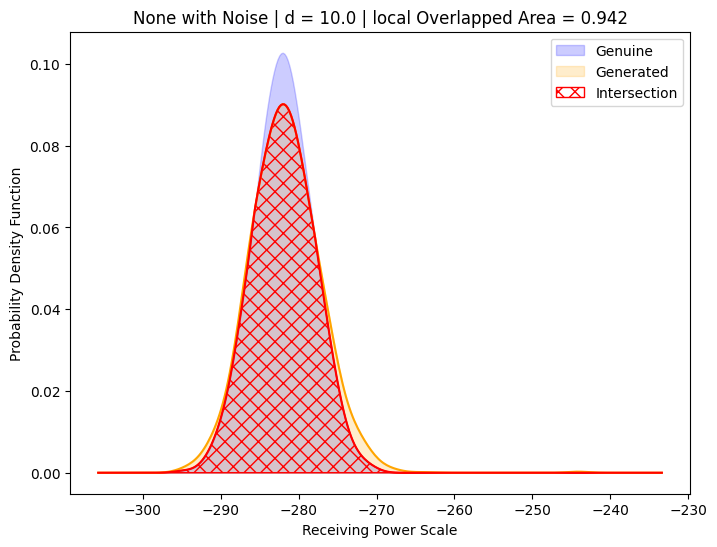

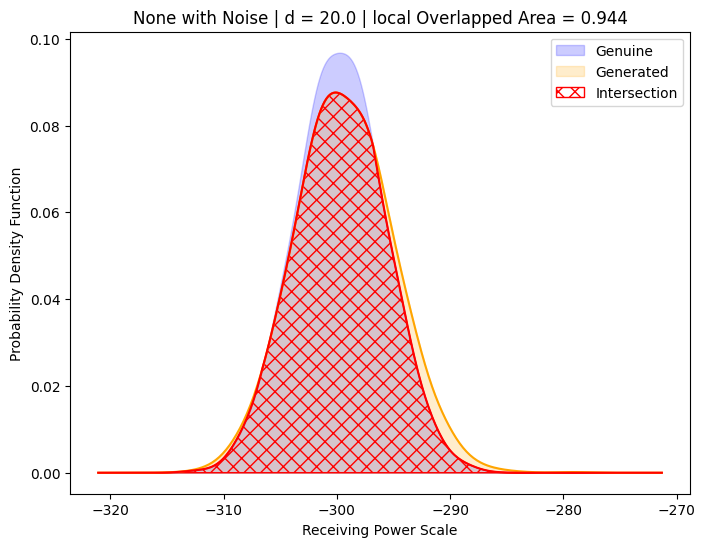

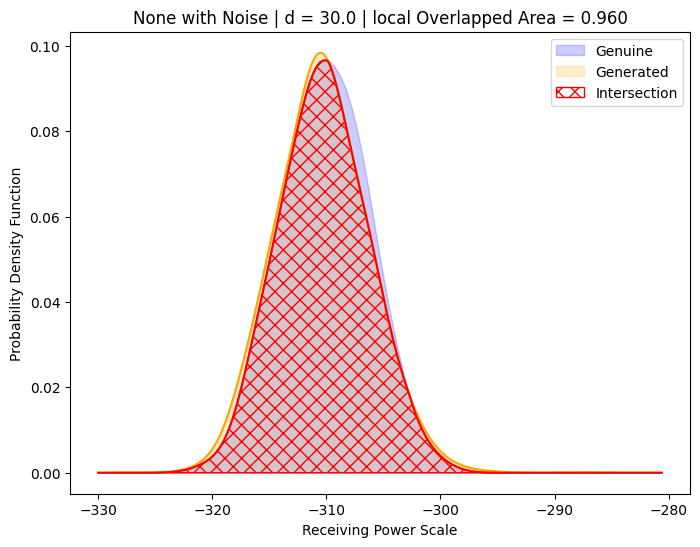

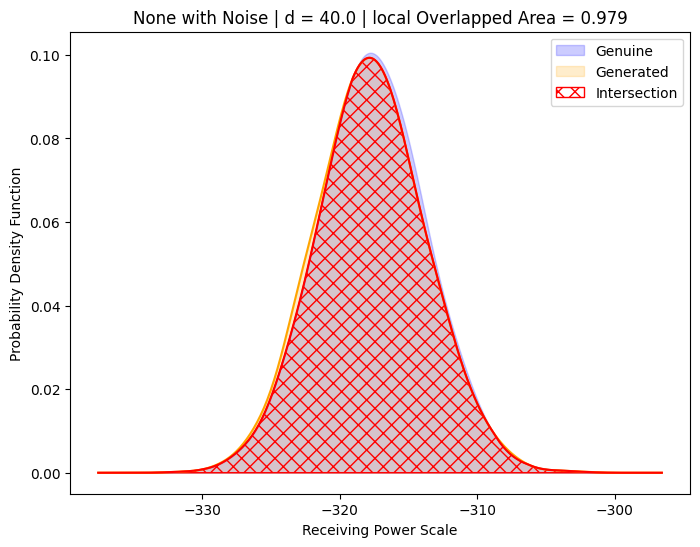

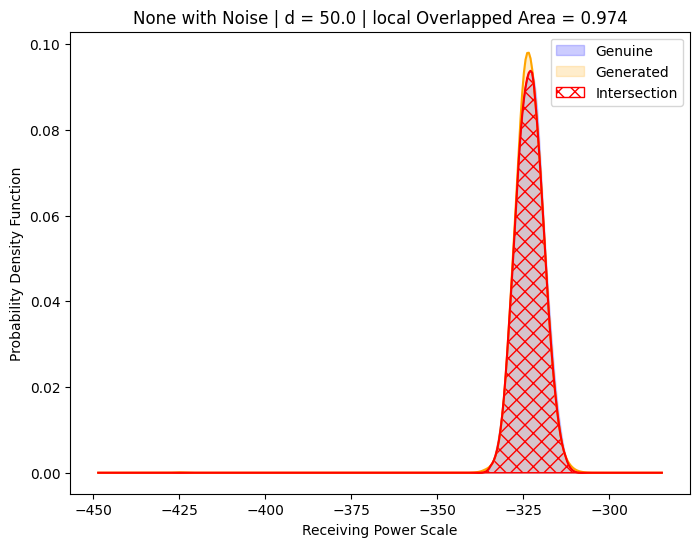

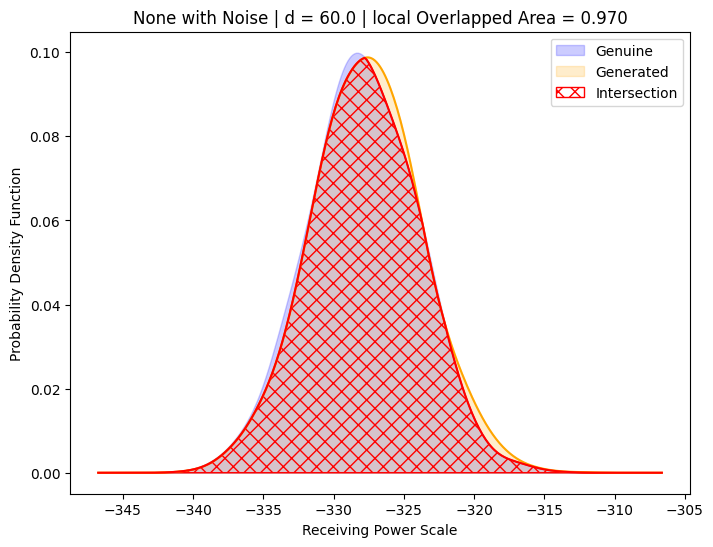

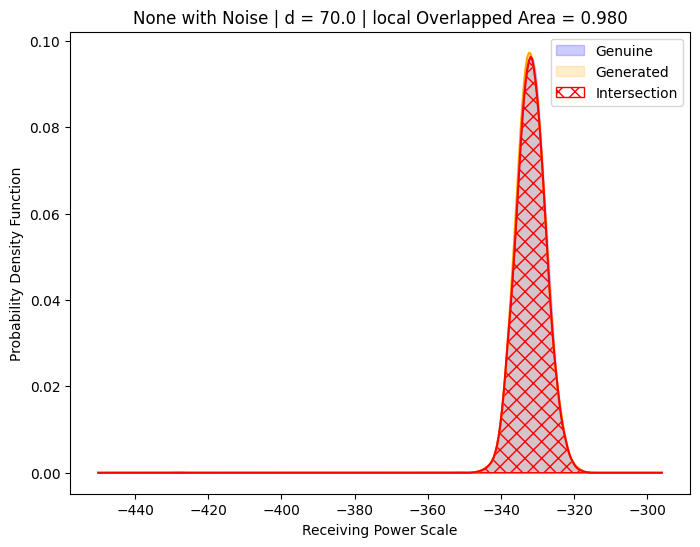

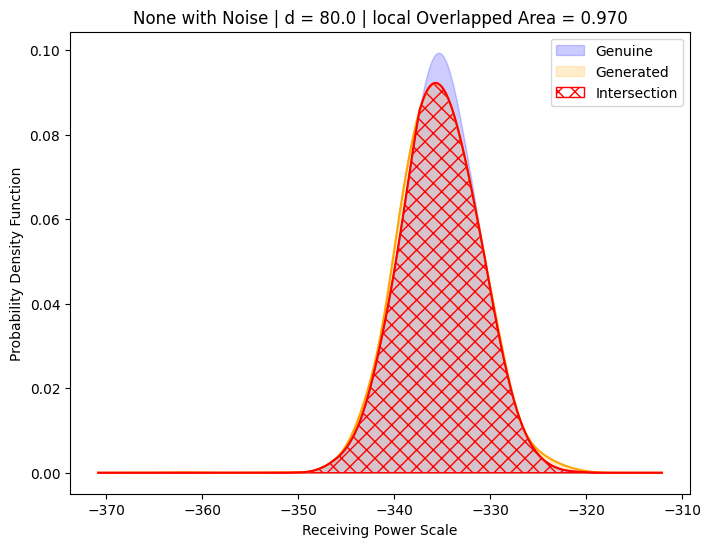

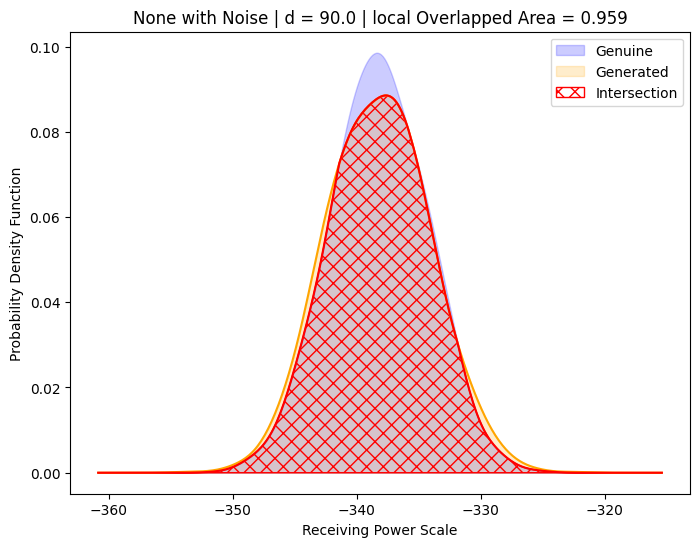

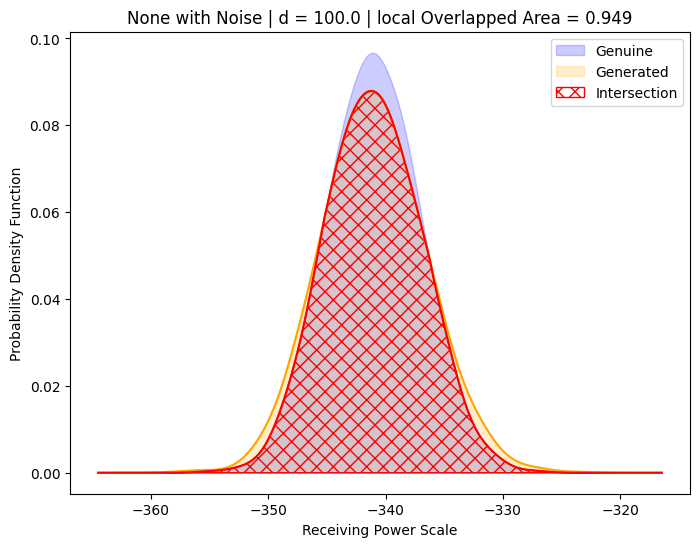

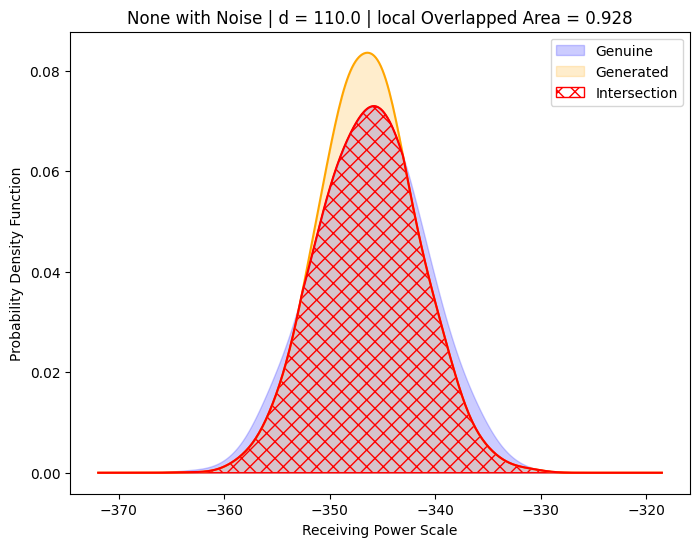

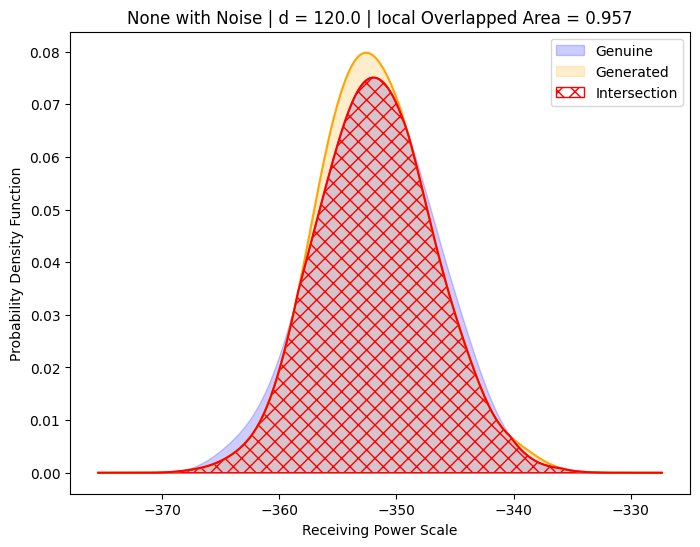

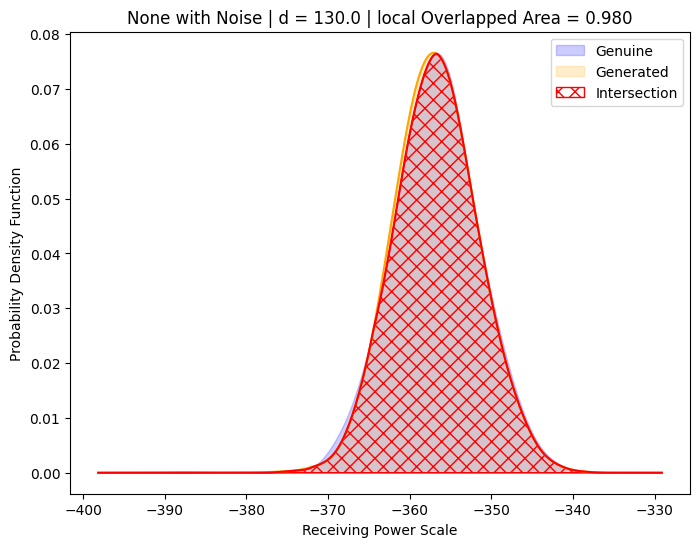

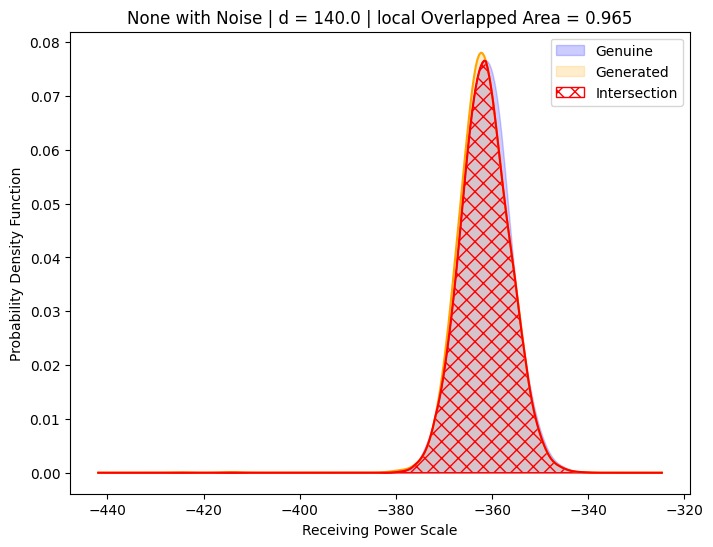

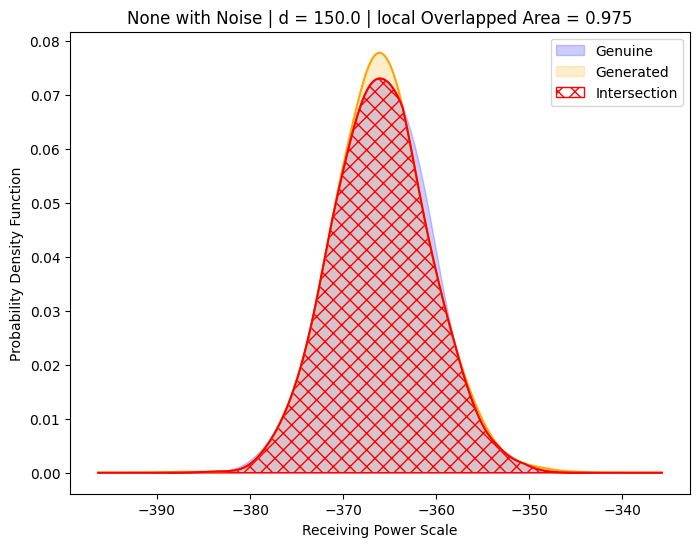

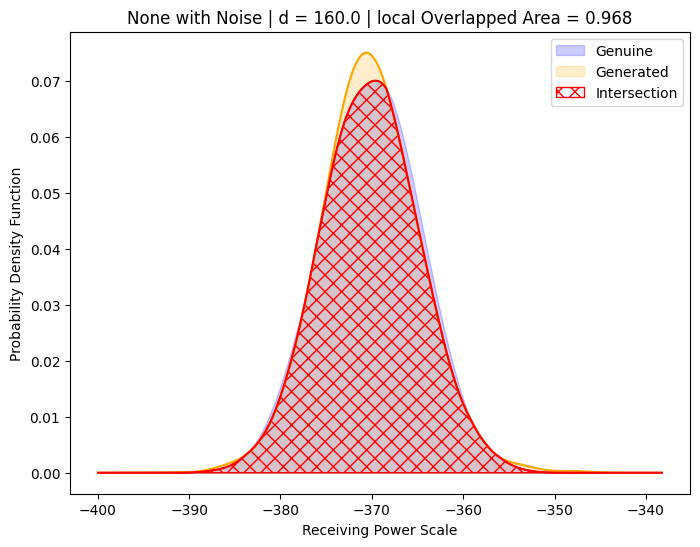

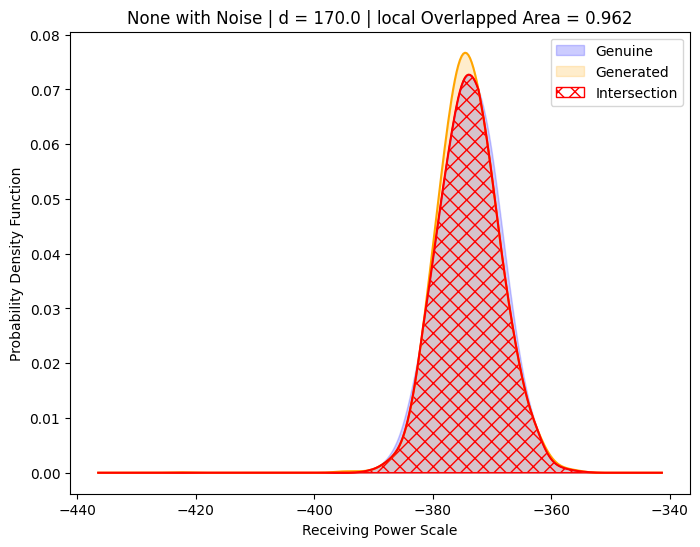

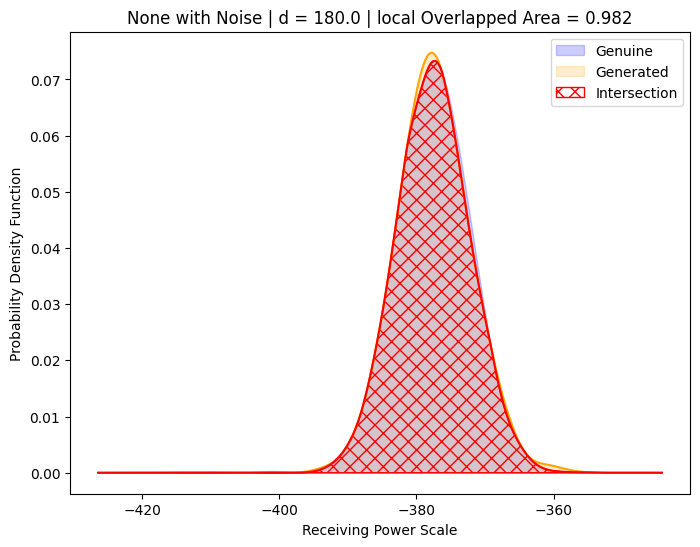

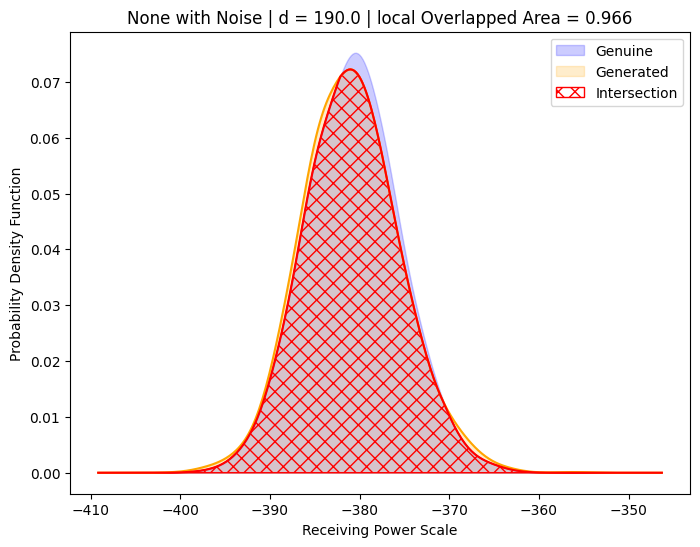

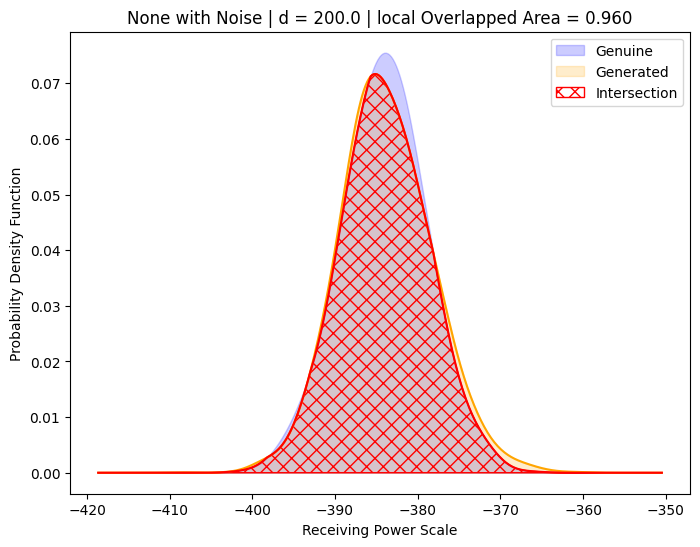

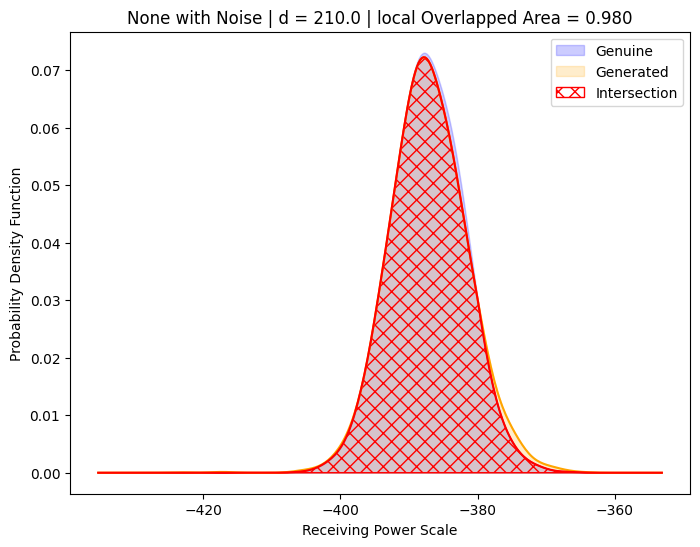

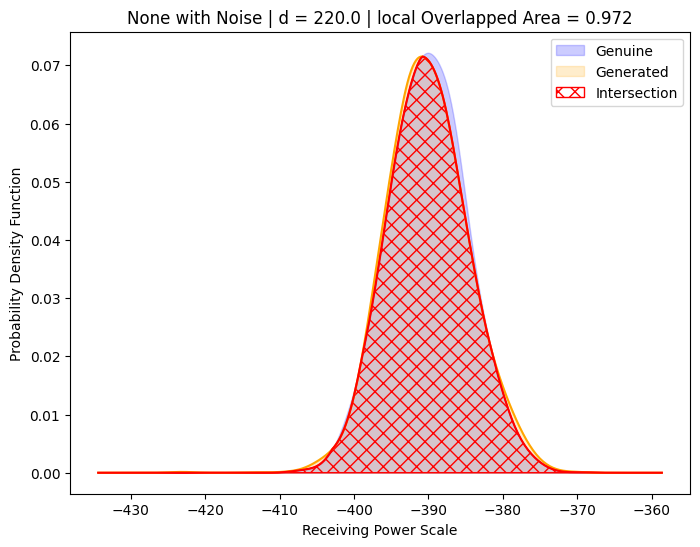

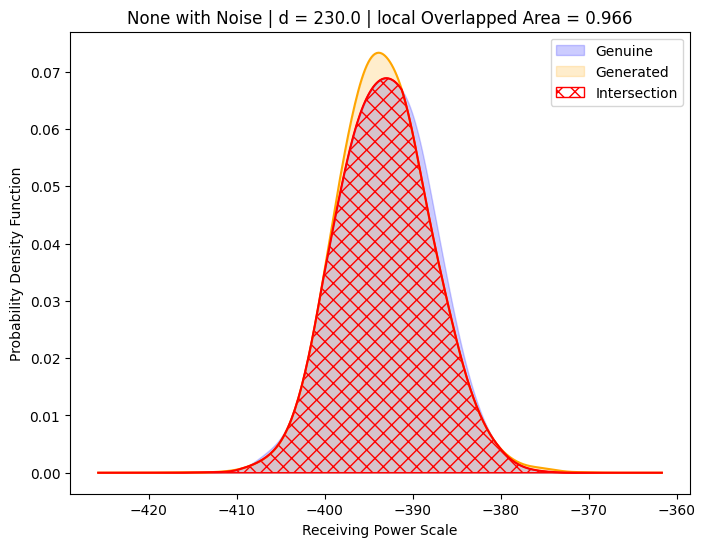

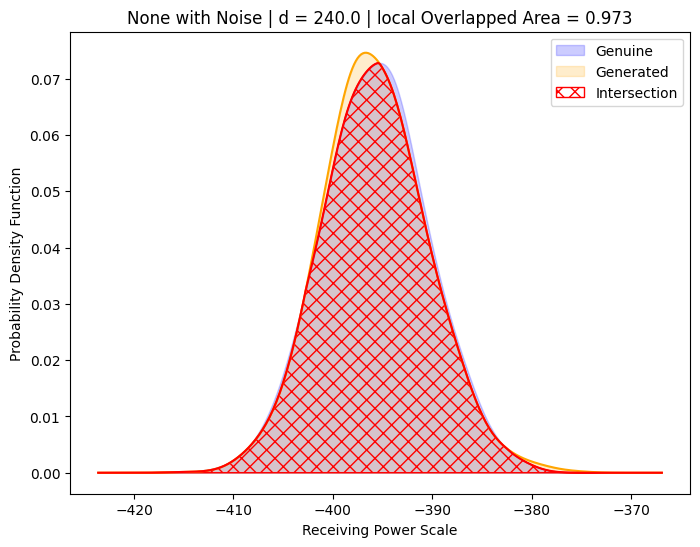

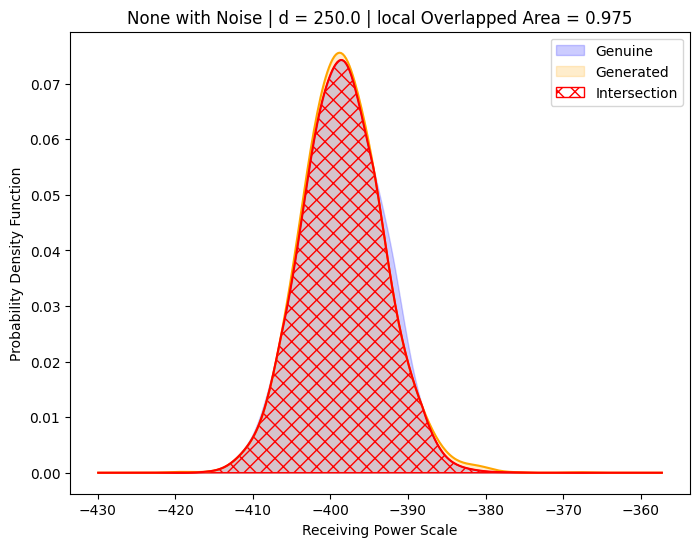

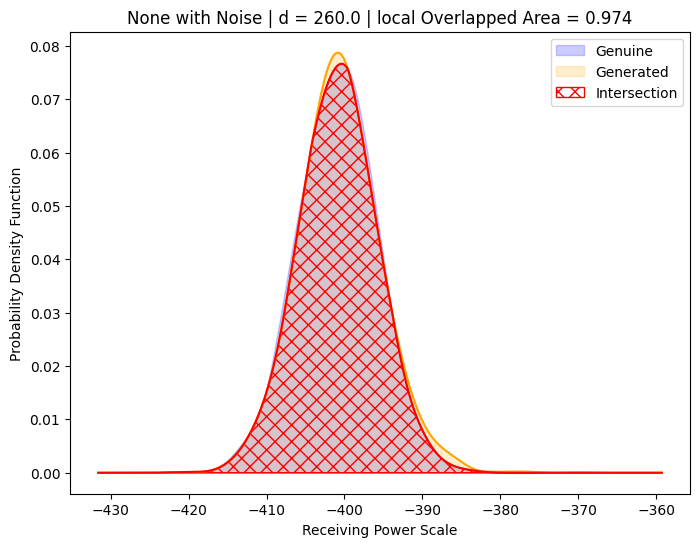

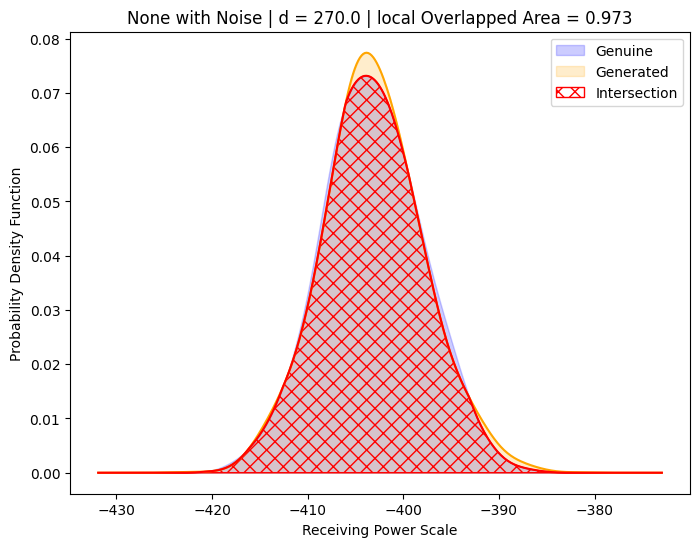

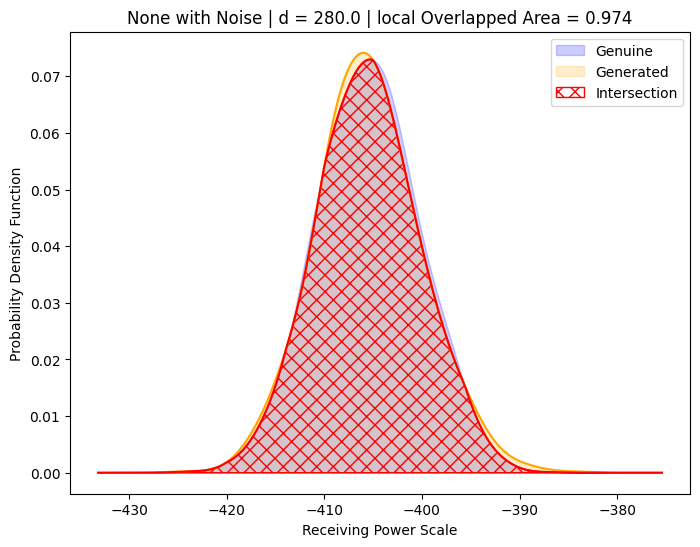

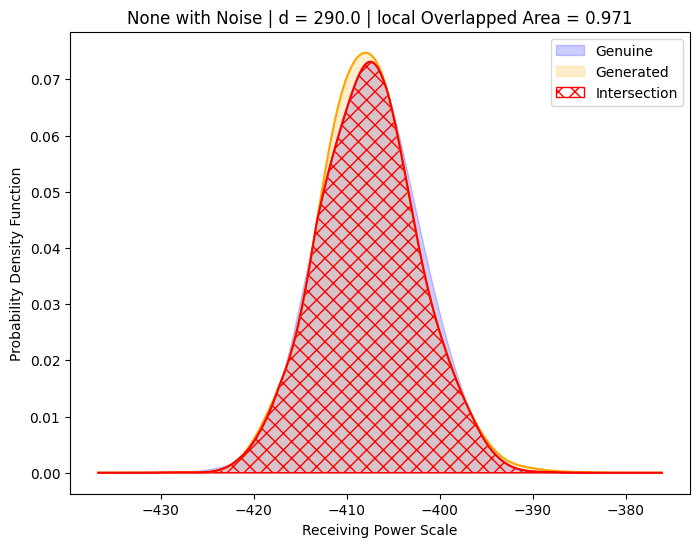

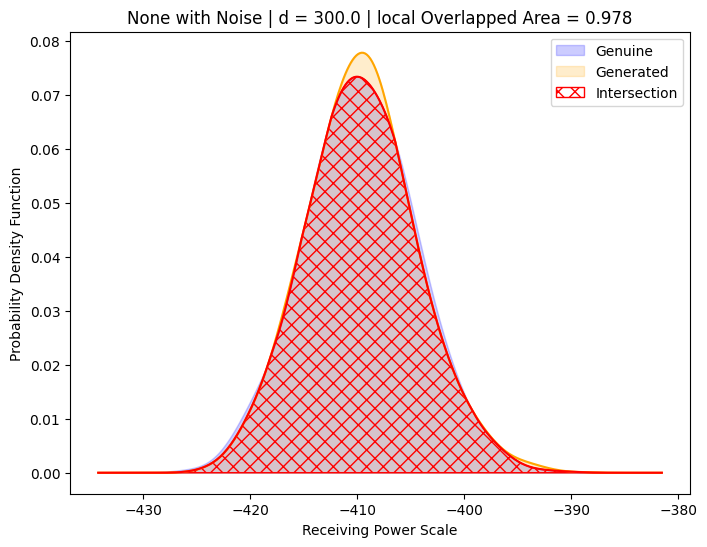

In [15]:
df_ln_f_oa_best = evaluations.evaluation_OA(
    df_to_evaluate=df_ln_f_test_back_scaled,
    name_model=None,
    dir_main_to_save=f"./evaluations",
    show_plot=True,
    to_save=False,
    # is_lognormal=True,
)

In [16]:
df_ln_f_oa_best

d  area_overlapped
0    0.0         0.942105
1    1.0         0.944249
2    2.0         0.960177
3    3.0         0.979155
4    4.0         0.974480
5    5.0         0.970478
6    6.0         0.979688
7    7.0         0.970453
8    8.0         0.959436
9    9.0         0.948628
10  10.0         0.928397
11  11.0         0.956829
12  12.0         0.980148
13  13.0         0.964926
14  14.0         0.975357
15  15.0         0.968164
16  16.0         0.961667
17  17.0         0.982011
18  18.0         0.965526
19  19.0         0.960408
20  20.0         0.979641
21  21.0         0.971573
22  22.0         0.965848
23  23.0         0.972909
24  24.0         0.974555
25  25.0         0.973760
26  26.0         0.973067
27  27.0         0.973760
28  28.0         0.970928
29  29.0         0.978134

## Median LN1 with Random Init

In [17]:
median_ln_f = df_whole_ln_f.shape[0]//2
median_version_ln_f = df_whole_ln_f.sort_values(by='metric', ascending=False).iloc[[median_ln_f]]['version'].values[0]
median_epoch_ln_f = df_whole_ln_f.sort_values(by='metric', ascending=False).iloc[[median_ln_f]]['epoch'].values[0]
df_whole_ln_f.sort_values(by='metric', ascending=False).iloc[[median_ln_f]]

epoch      loss  val_loss    avg_oa       std  version    metric
147     13 -1.043563 -1.042831  0.805427  0.084585        9  0.636256

In [18]:
############################
### ATTENTION PLEASE!!!!!!##
############################
# This should be replaced to '../saved_models/LogNormal_median.h5'
median_version_ln_f, median_epoch_ln_f

(9, 13)

In [19]:
df_ln_f_med_test_back_scaled = df_ln_test_back_scaled.copy()

model_mdn = tf.keras.models.load_model(
    f"{dir_ln_f}/{median_version_ln_f}/{dir_sub_ln_f}/{dir_sub_ln_f}_ep_{str(median_epoch_ln_f).zfill(2)}.h5", 
    custom_objects={"mdn_loss":model.model_MDN().mdn_loss}
)

predicted_ln_f_med_data = model_mdn.predict(df_ln_f_med_test_back_scaled['d'])
df_ln_f_med_test_back_scaled['generated'] = utils.inverse_log_transform_ln(np.squeeze(predicted_ln_f_med_data))

3125/3125 [==============================] - 3s 987us/step


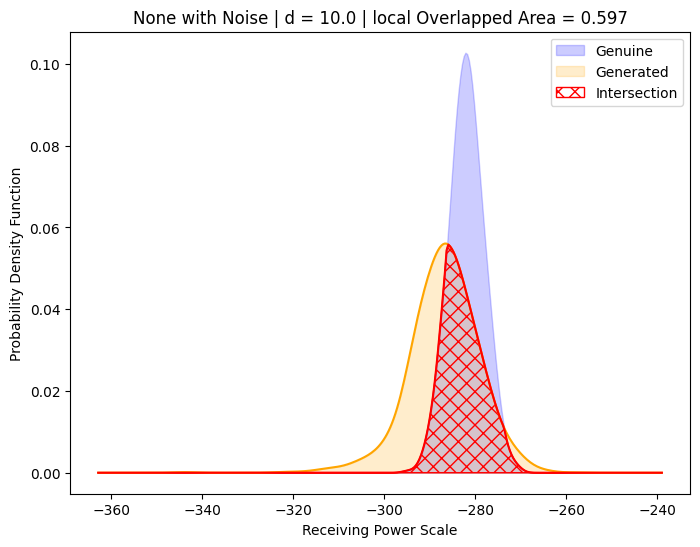

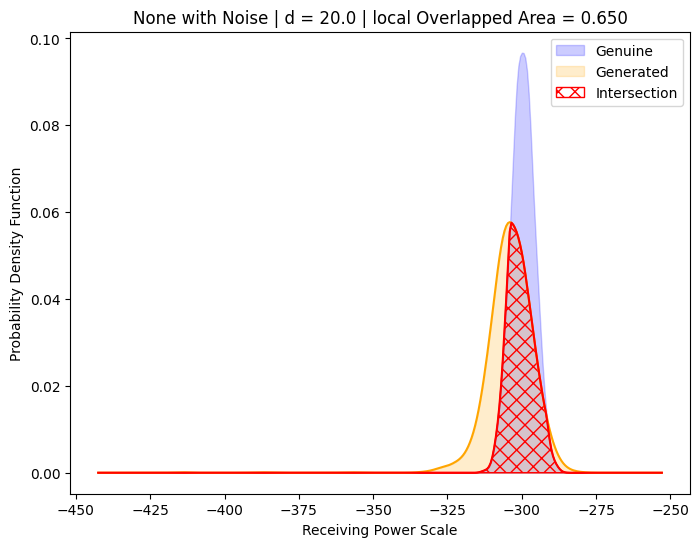

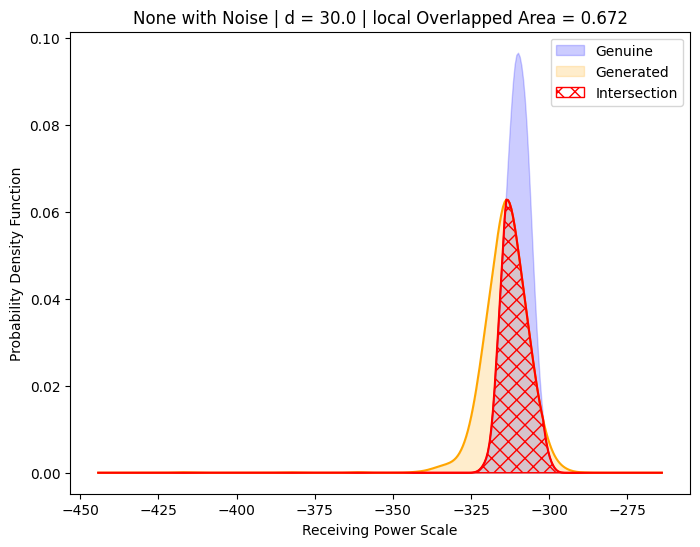

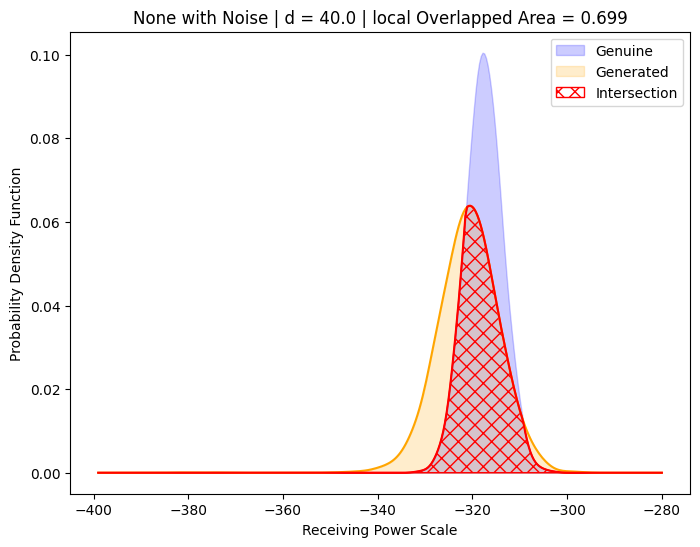

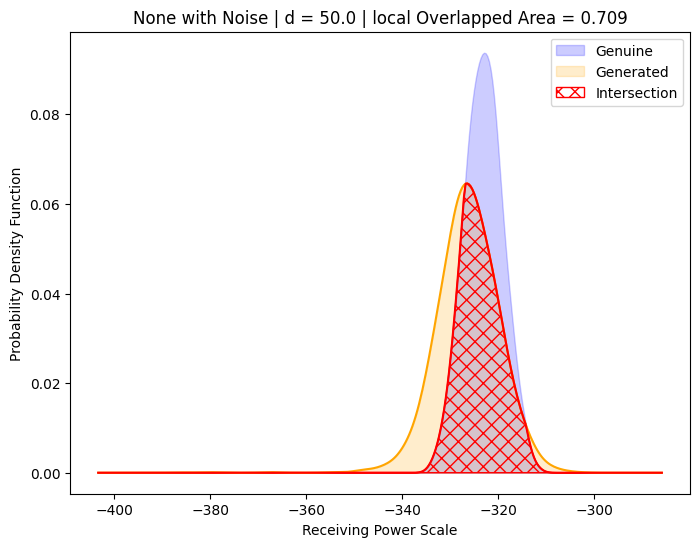

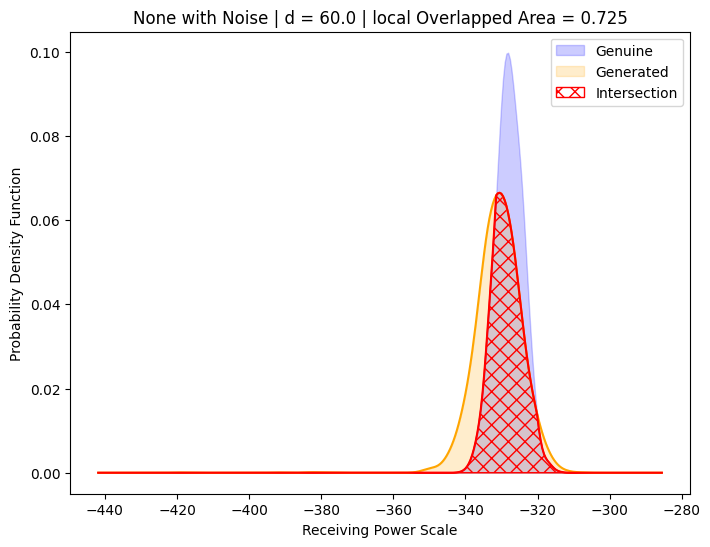

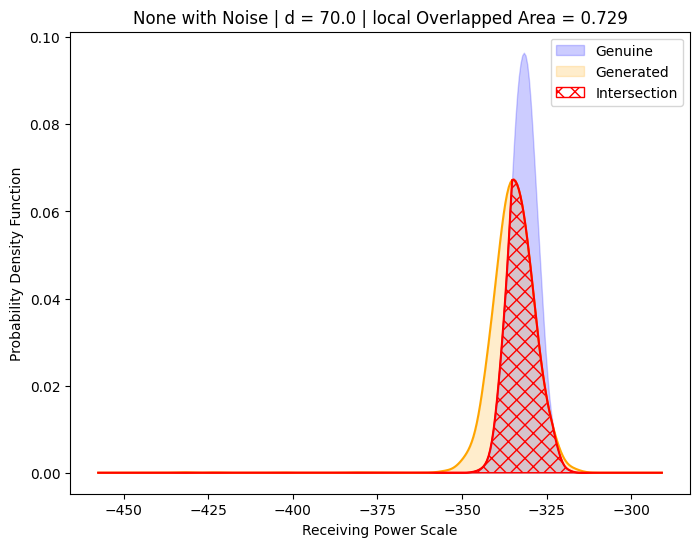

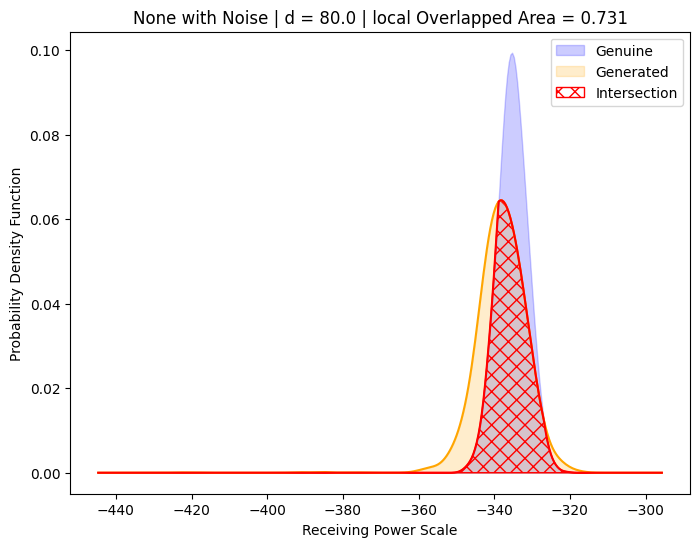

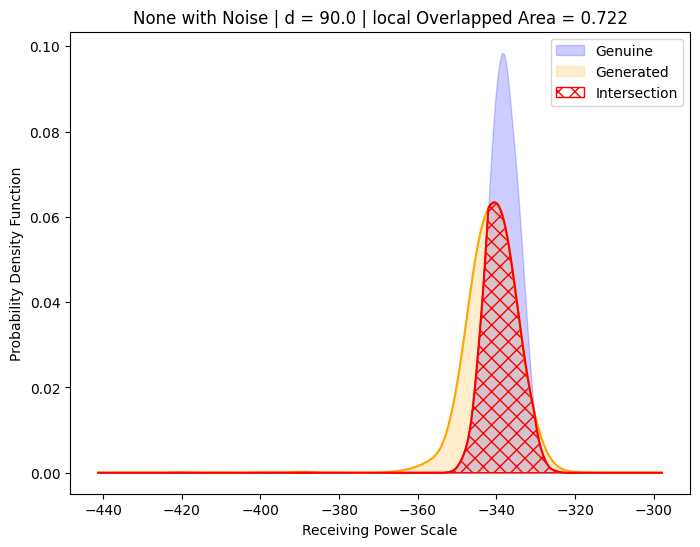

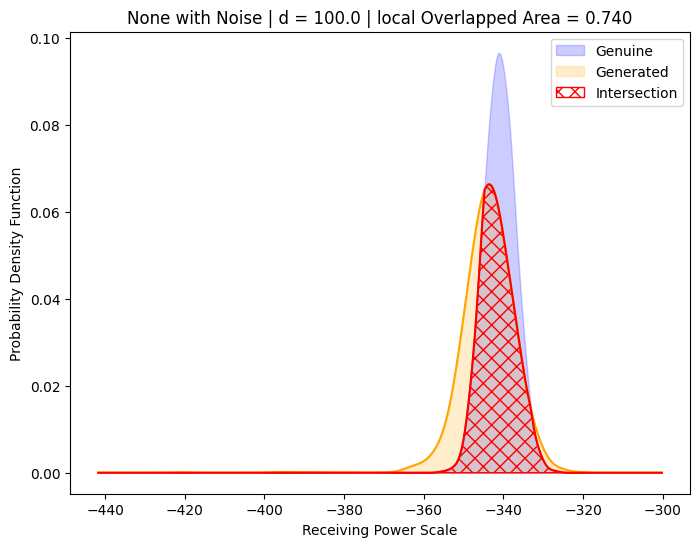

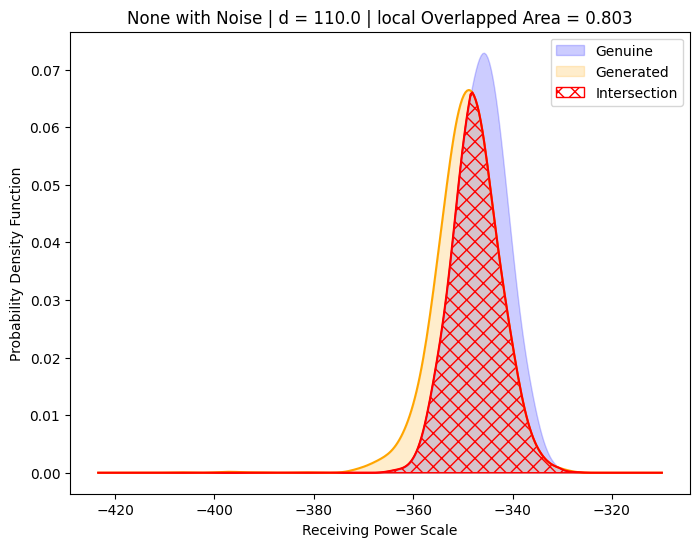

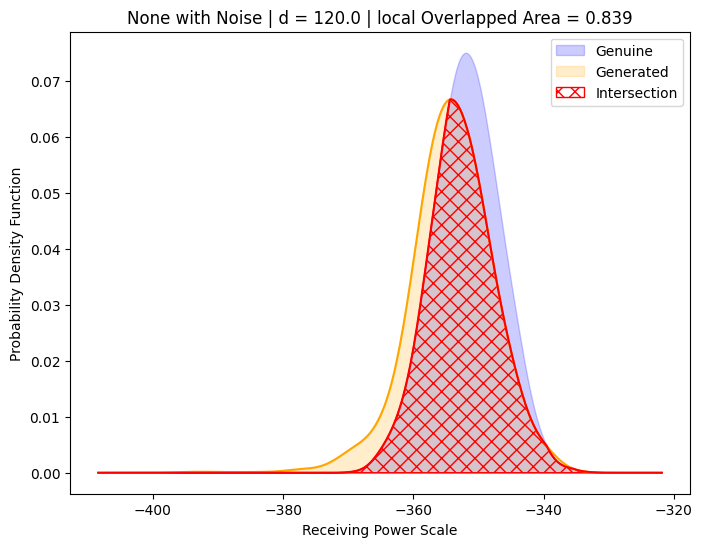

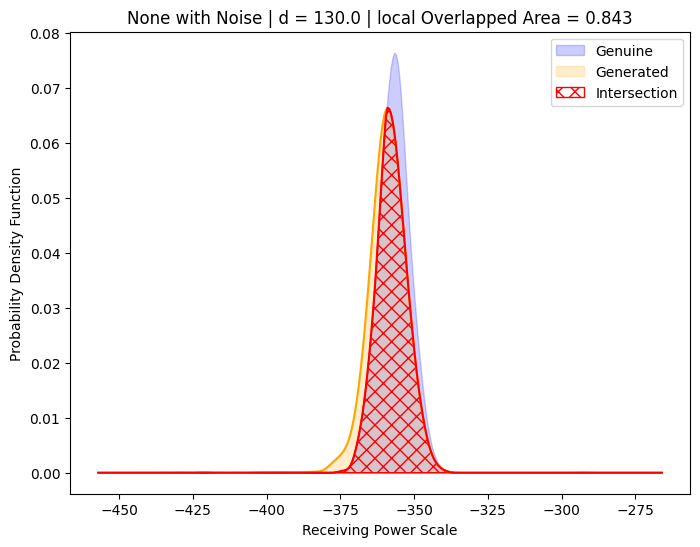

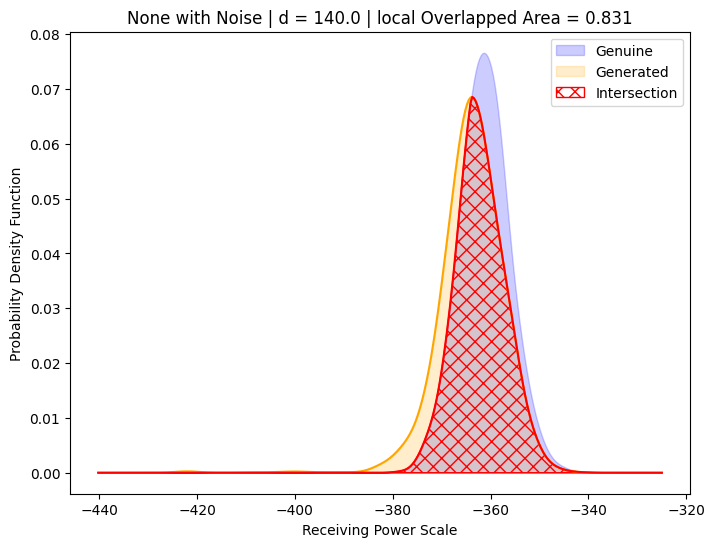

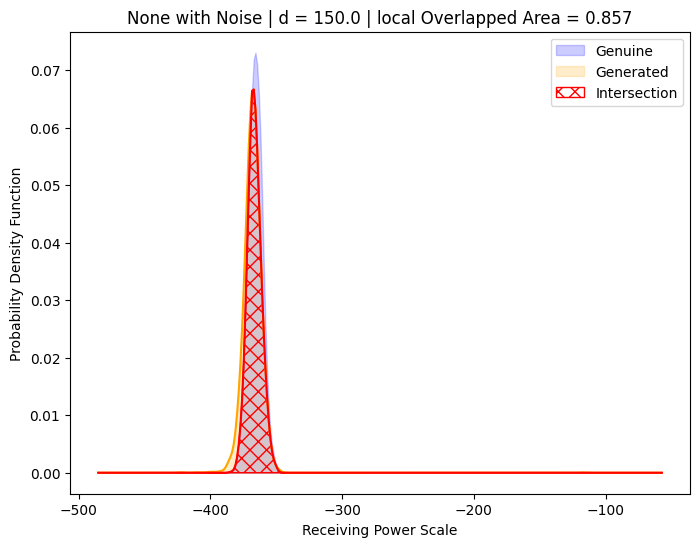

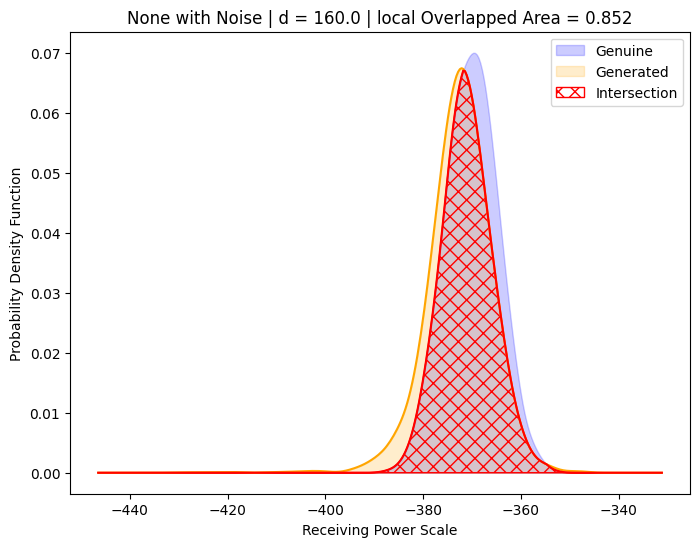

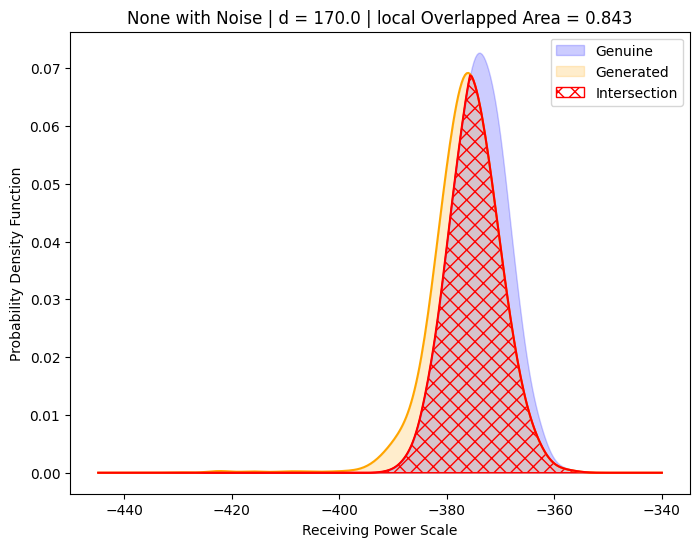

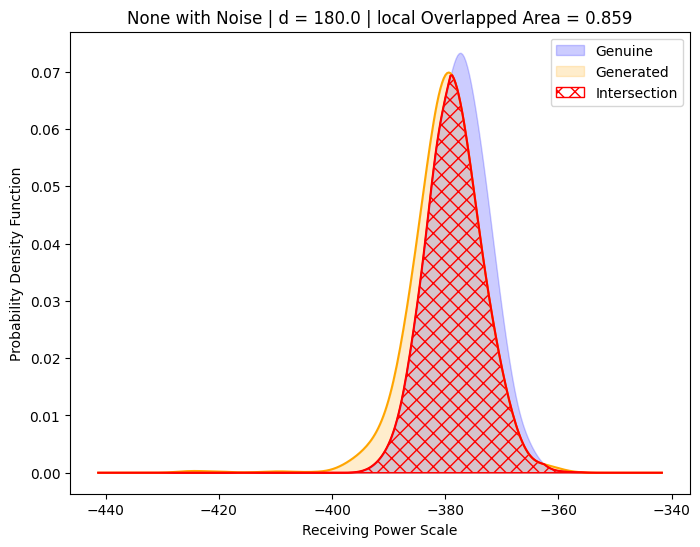

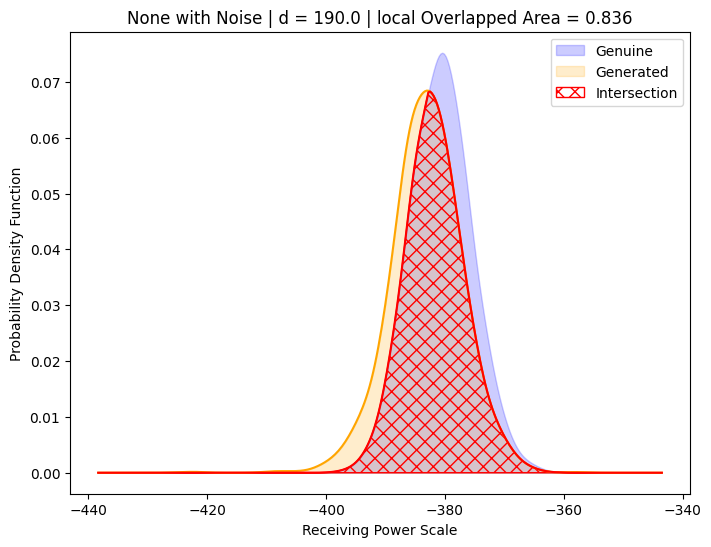

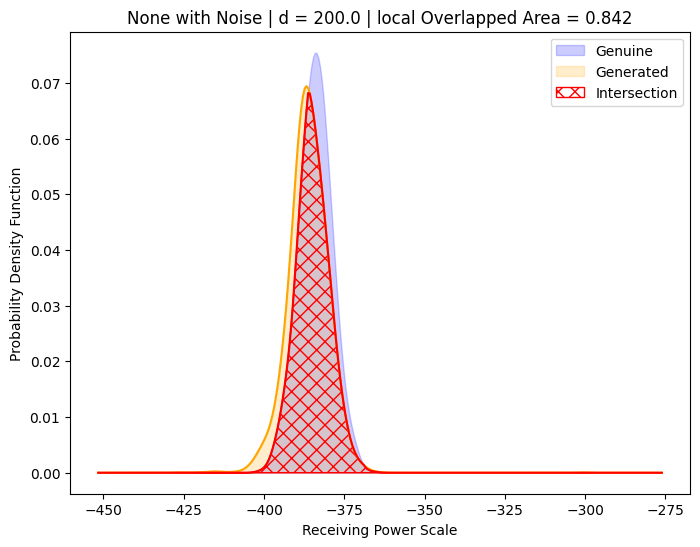

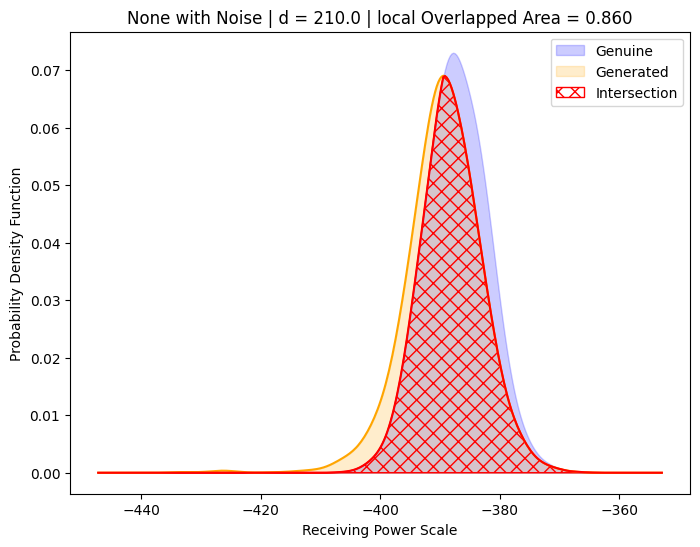

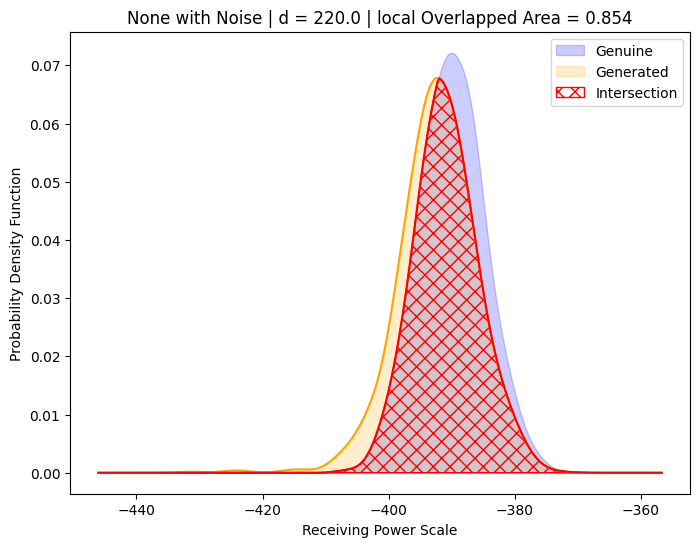

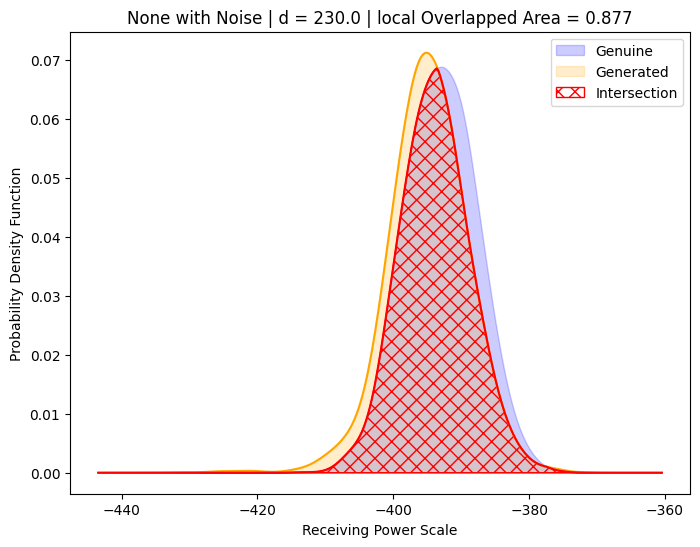

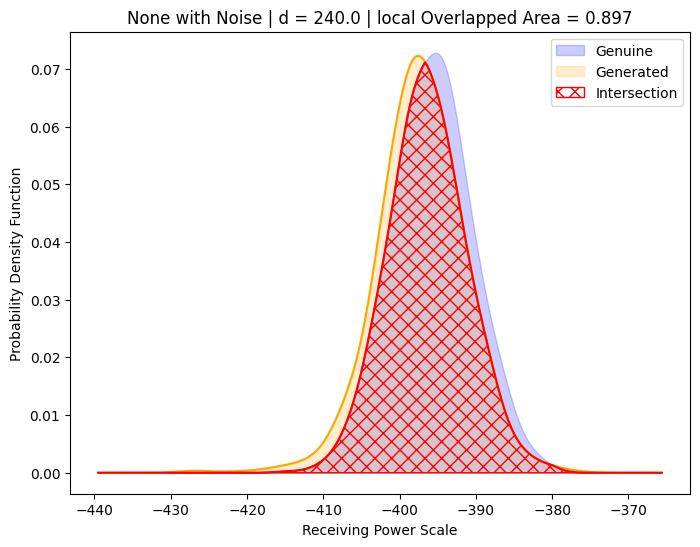

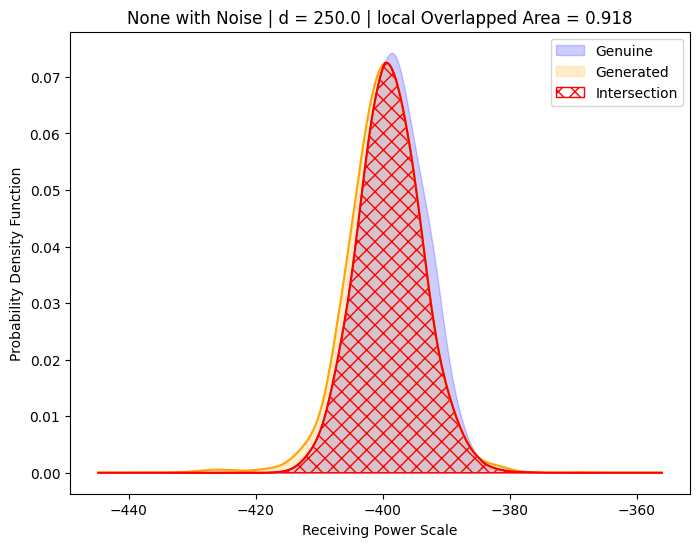

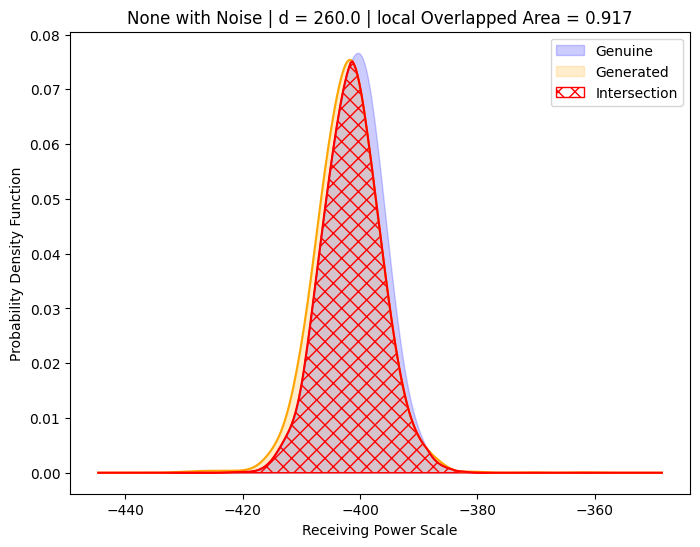

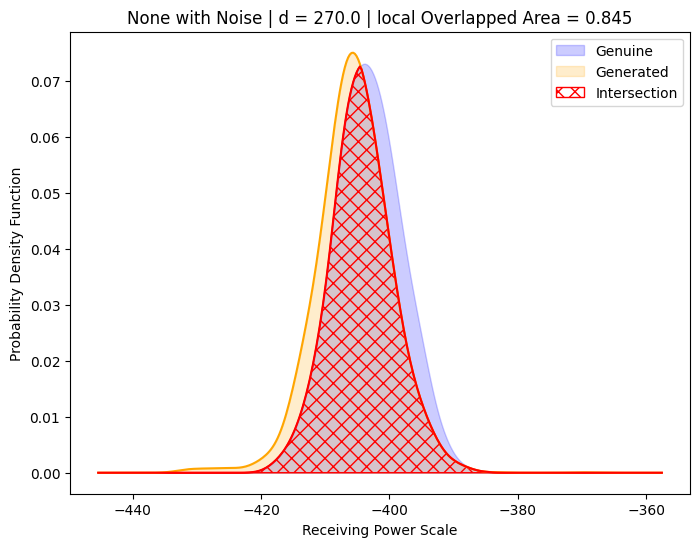

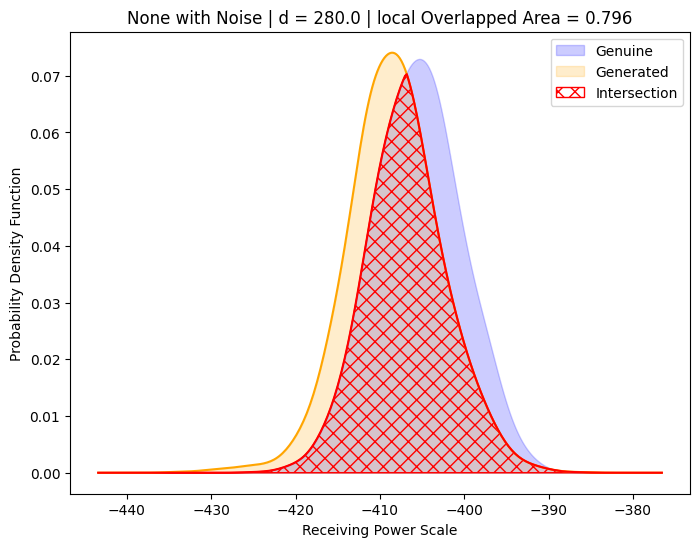

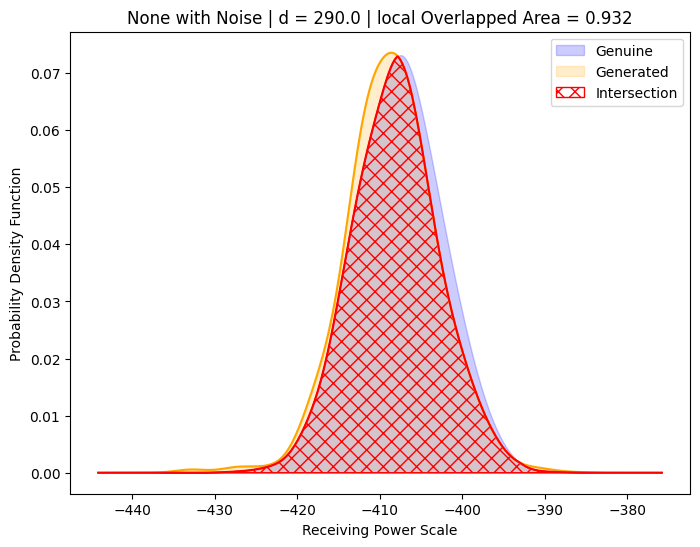

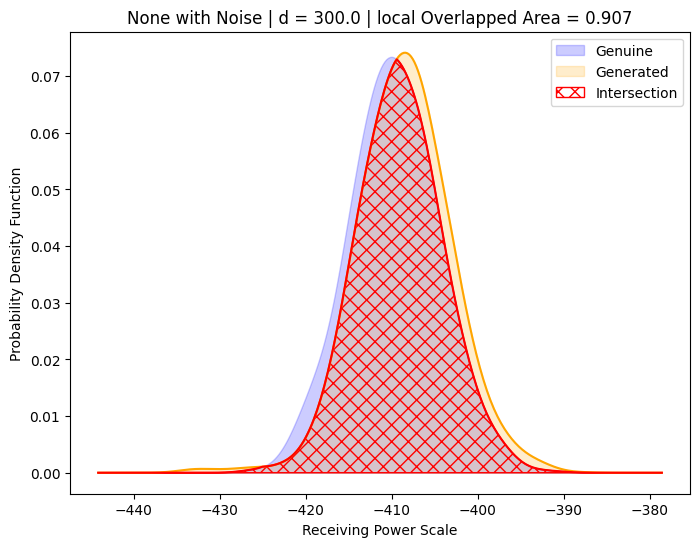

In [20]:
df_ln_f_oa_median = evaluations.evaluation_OA(
    df_to_evaluate=df_ln_f_med_test_back_scaled,
    name_model=None,
    dir_main_to_save=f"./evaluations",
    show_plot=True,
    to_save=False,
    # is_lognormal=True,
)

In [21]:
df_ln_f_oa_median

d  area_overlapped
0    0.0         0.597205
1    1.0         0.649648
2    2.0         0.672132
3    3.0         0.698605
4    4.0         0.708898
5    5.0         0.724792
6    6.0         0.729154
7    7.0         0.731330
8    8.0         0.721630
9    9.0         0.739780
10  10.0         0.802788
11  11.0         0.839199
12  12.0         0.842843
13  13.0         0.831240
14  14.0         0.856895
15  15.0         0.851898
16  16.0         0.842701
17  17.0         0.859421
18  18.0         0.836432
19  19.0         0.842310
20  20.0         0.859794
21  21.0         0.854273
22  22.0         0.876709
23  23.0         0.896947
24  24.0         0.917790
25  25.0         0.916902
26  26.0         0.845373
27  27.0         0.795749
28  28.0         0.931781
29  29.0         0.907090